# __EDA__

In [38]:
import pandas as pd
import yfinance as yf
import ydata_profiling as ppf
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#Revisamos de la pagina de wikipedia informacion extra.
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
payload = pd.read_html(url)
 
first_table = payload[0]; second_table = payload[1]

df500_table = first_table
#Visualizamos
df500_table

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [9]:
df500_table.profile_report(title='S&P 500')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
# Seleccionamos las empresas farmacéuticas del S&P500
tickers = ['JNJ', 'PFE', 'MRK', 'ABBV', 'BMY', 'GSK', 'NVS']

# Descargamos los datos de los precios de cierre de los últimos 5 años
df = yf.download(tickers, start="2020-01-01", end="2023-3-20")['Adj Close']

# Ahora resumimos los datos para ver estadísticas descriptivas
print(df.describe())


[*********************100%***********************]  7 of 7 completed
             ABBV         BMY         GSK         JNJ         MRK         NVS  \
count  808.000000  808.000000  808.000000  808.000000  808.000000  808.000000   
mean   113.221544   62.972628   36.331573  154.746661   78.574295   79.745957   
std     28.620564    7.690152    3.678820   14.851966   12.525588    4.357423   
min     56.355022   42.279716   27.553877  102.753578   57.486164   62.497223   
25%     87.141068   56.962041   33.580297  139.646648   69.978117   76.645645   
50%    107.371128   60.978672   35.837795  157.501060   73.573505   79.972515   
75%    141.761108   70.200531   39.329587  165.988613   85.252279   82.722404   
max    168.544312   80.493202   45.074963  181.108826  114.047096   89.845345   

              PFE  
count  808.000000  
mean    40.270447  
std      7.989764  
min     24.230366  
25%     32.792919  
50%     39.938566  
75%     47.605341  
max     58.783733  


## __Conceptos:__
- __Distribución de precios de cierre:__  La distribución de precios de cierre es una medida estadística que nos ayuda a entender cómo se han distribuido los precios de cierre de una determinada acción o valor bursátil en un período de tiempo determinado.

- __Evolucion de precios de cierre:__ A evolución de los precios de cierre se refiere a cómo varía el precio de un activo financiero en el mercado al final de cada día. Es decir, el precio al cual se cerró la transacción de compra y venta de ese activo. El seguimiento de la evolución de los precios de cierre a lo largo del tiempo es importante para los inversores ya que les ayuda a entender cómo está cambiando el valor de sus inversiones y a tomar decisiones informadas sobre cuándo comprar o vender.

- __Distribucion de los retornos diarios:__ La distribución de los retornos diarios se refiere a la variación porcentual en el precio de cierre de una acción de un día a otro. Es decir, mide cuánto cambia el precio de una acción en un solo día de negociación.

- __Correlación entre los precios de cierre:__  La correlación entre los precios de cierre es una medida estadística que describe la relación entre los precios de cierre de dos activos financieros. La correlación puede variar entre -1 y 1, donde -1 indica una correlación negativa perfecta (cuando un activo aumenta, el otro disminuye), 1 indica una correlación positiva perfecta (ambos activos se mueven en la misma dirección) y 0 indica que no hay correlación entre los dos activos.


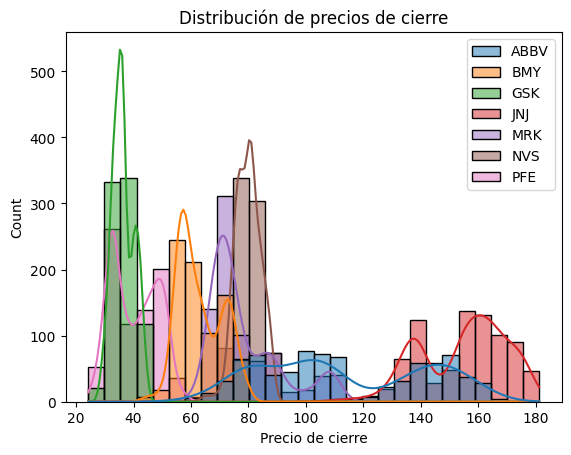

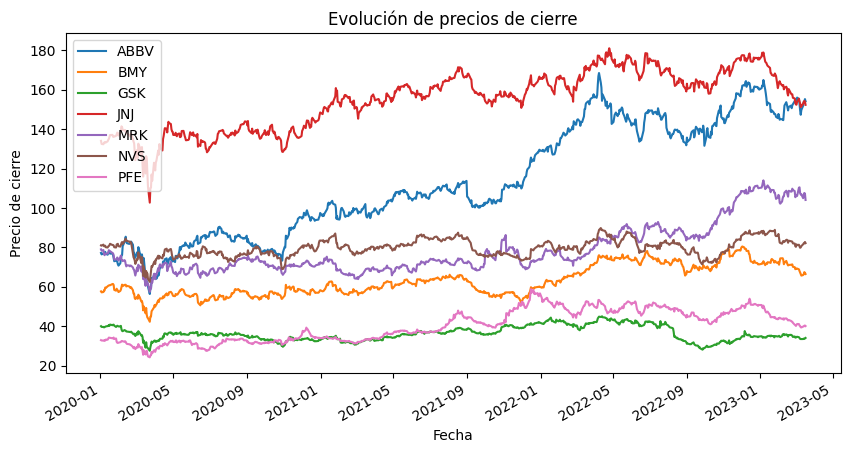

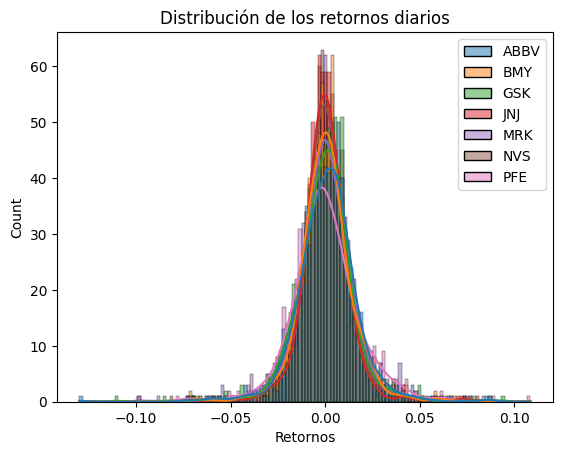

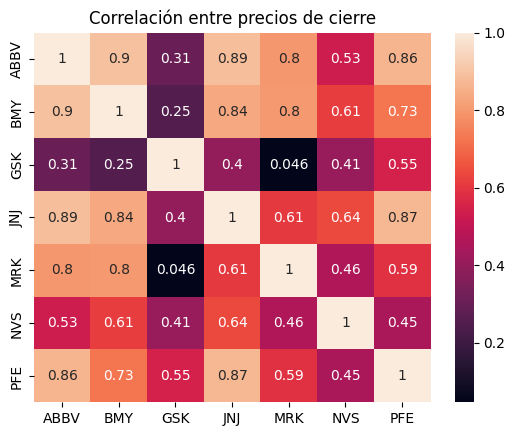

In [40]:

# Visualizamos la distribución de los precios de cierre
sns.histplot(df, kde=True)
plt.title('Distribución de precios de cierre')
plt.xlabel('Precio de cierre')
plt.show()

# Visualizamos la evolución de los precios de cierre a lo largo del tiempo
df.plot(figsize=(10, 5))
plt.title('Evolución de precios de cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.show()

# Calcular los retornos diarios y visualizar la distribución de los retornos
returns = df.pct_change()
sns.histplot(returns, kde=True)
plt.title('Distribución de los retornos diarios')
plt.xlabel('Retornos')
plt.show()

# Visualizar la correlación entre los precios de cierre de las empresas farmacéuticas
sns.heatmap(df.corr(), annot=True)
plt.title('Correlación entre precios de cierre')
plt.show()

In [41]:
df.to_csv('Pharmaceutical_Sector.csv', index=False)

In [6]:
df

,ABBV,BMY,GSK,JNJ,MRK,NVS,PFE
Date,,,,,,,
2016-01-04,42.025932,54.588070,27.591276,82.852531,40.004810,56.903248,23.214975
2016-01-05,41.850857,55.663040,27.748165,83.198845,40.515553,57.208500,23.382095
2016-01-06,41.858147,54.685780,27.448038,82.778313,39.959076,56.425449,22.967930
2016-01-07,41.734135,53.171036,26.609039,81.813553,39.608429,55.702137,22.815342
2016-01-08,40.596127,51.819160,26.888710,80.939507,38.937622,54.122776,22.524698
...,...,...,...,...,...,...,...
2021-12-23,126.892914,59.708508,41.494717,162.771896,72.864861,79.713310,56.346004
2021-12-27,128.151459,59.939457,41.807636,164.145676,73.673073,80.587158,56.816280
2021-12-28,128.132385,59.997192,41.826603,164.803558,73.903976,81.065468,55.674191


# __PREPARACION DE DATASET PARA USAR EN EL MODELO__

In [28]:

# Creamos una lista de símbolos de acciones a descargar
symbols = ['JNJ', 'PFE', 'MRK', 'ABBV', 'BMY', 'GSK', 'NVS']

# Descarga de los datos, precios de cierre ajustados para cada símbolo en la lista
prices_df = pd.DataFrame()
for symbol in symbols:
    data = yf.download(symbol, start='2000-01-01', end='2022-12-31')
    prices_df[symbol] = data['Adj Close']

# Calcular los retornos diarios para cada acción
returns_df = prices_df.pct_change()

# Crear un DataFrame de características para el modelo de forecasting
model_df = pd.DataFrame()
model_df['y'] = prices_df['PFE'].values # Variable de respuesta (precio de cierre ajustado de PFE)
model_df['ds'] = prices_df.index # Variable de fecha (índice de fechas de precios_df)

# Añadir características relevantes
model_df['pfe_returns'] = returns_df['PFE'].values # Retornos diarios de PFE
model_df['sector'] = 'Pharmaceuticals' # Sector de la industria

# Eliminar cualquier fila que contenga valores faltantes
model_df.dropna(inplace=True)

# Convertir la columna 'ds' a formato de fecha de Pandas
model_df['ds'] = pd.to_datetime(model_df['ds'])

# Restablecer el índice para que 'ds' sea una columna
model_df = model_df.reset_index()

# Exportacion del DataFrame
model_df.to_csv('model_df.csv', index=False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
